# Setup workspace, load data, and calculate needed variables

### Import packages and setup options/directories

In [1]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import datetime
import geopandas as gpd
from glob import glob
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import regionmask
#from reverse_colormap import reverse_colormap # in python dir
import scipy.stats as stats
from scipy import interpolate as spinterpolate
from shapely.geometry import Polygon
import warnings
import xarray as xr

In [2]:
%matplotlib inline

In [3]:
warnings.filterwarnings('ignore')

In [4]:
# - See what dir we're in
os.getcwd()

'/opt/skipjack-bigeye-separation/python/bet_skj_separation_paper_v3'

In [5]:
# - Choose set types you want to analyze
# ...settypes options are: afaddfad, afaddfadlog, allsets,
# unassociated, unassociatedother
# ...catchorcpue options are: catch, CPUE 
settypes = 'afaddfadlog'
catchorcpue = 'CPUE'

In [6]:
# - Set data path
dpath = '/opt/skipjack-bigeye-separation/data/'

In [7]:
# - Set saved out figure path
figpath = '/opt/skipjack-bigeye-separation/python/bet_skj_separation_paper_v3/figures_' + settypes + catchorcpue + '/'

### Define fxns

In [8]:
%run helper_notebooks/bet_skj_sep_fxns.ipynb

### Load WCPFC and ENSO time series data

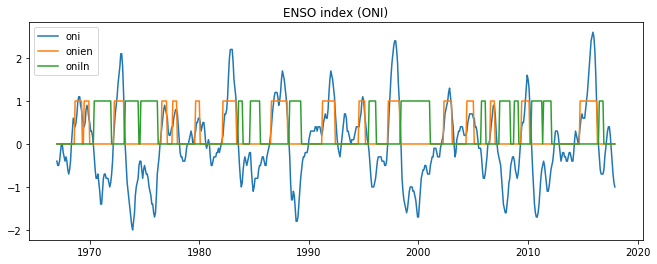

In [9]:
%run helper_notebooks/wcpfc_enso_load_and_calc.ipynb

### Compute temporal correlations btwn BET and BET:SKJ vs. SKJ CPUE

In [10]:
%run helper_notebooks/compute_bet_b2s_vs_skj.ipynb

### Create EEZ map mask

In [11]:
%run helper_notebooks/create_eez_mask_map.ipynb

### Load oceanographic data

In [12]:
%run helper_notebooks/env_vars_load_and_calc.ipynb

### Put all CPUE and env vars into one xr dataset and onto same grid for ease of use by following calculations

In [13]:
dsallvars = bettoskj_cp_tot.to_dataset(name='bettoskj_cp_tot')
dsallvars['skj_cp_tot'] = skj_cp_tot
dsallvars['bet_cp_tot'] = bet_cp_tot
dsallvars['sst'] = sst
dsallvars['temp100'] = temp100
dsallvars['tcd'] = tcd
dsallvars['sss'] = sss
dsallvars['o2100'] = o2100
dsallvars['po2100'] = po2100
dsallvars['thd'] = thd
dsallvars['logchl'] = logchl
dsallvars['mld'] = mld
dsallvars['ssha'] = ssha
dsallvars['oni'] = oni
dfallvars = dsallvars.to_dataframe()
dfallvars.drop(columns=['depth'], inplace=True)
dfallvars.reset_index(inplace=True)

### Compute quotient analyses for SKJ and BET CPUE vs. environmental conditions

In [14]:
#%%script false --no-raise-error
%run helper_notebooks/compute_qa_bet_skj_cpue.ipynb

### Compute temporal correlations btwn SKJ, BET, BET:SKJ CPUE vs. environmental conditions

In [15]:
%run helper_notebooks/compute_bet_skj_b2s_vs_env.ipynb

# Plot main figures

### Figure 1

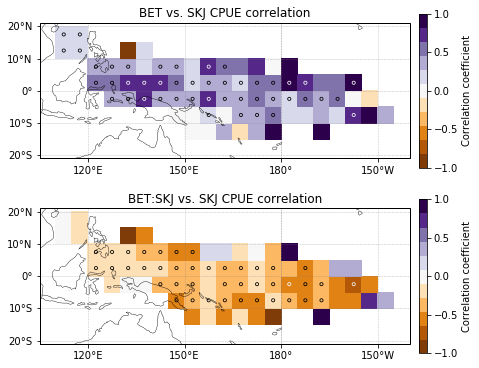

In [112]:
%run figure_notebooks/fig1.ipynb

### Figure 2

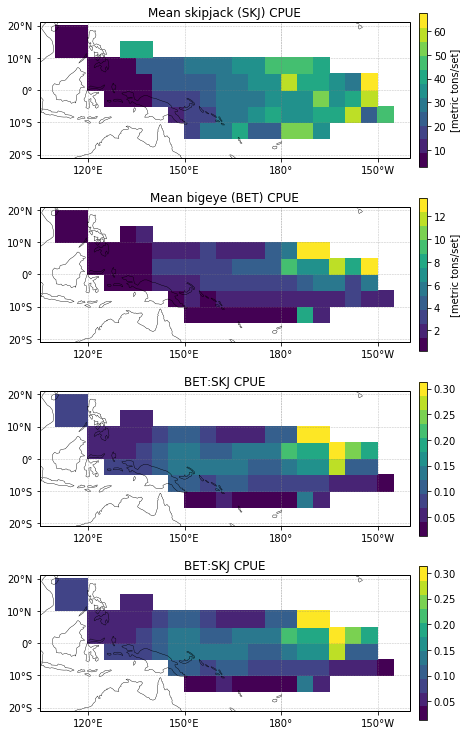

In [113]:
%run figure_notebooks/fig2.ipynb

### Figure 3

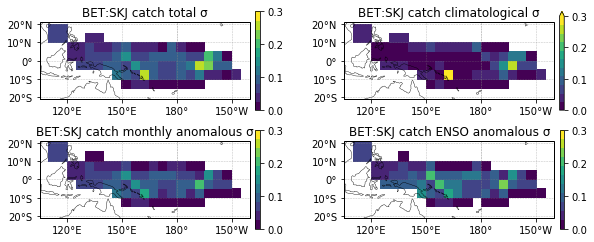

In [114]:
mapvarnow = 'bettoskj'
%run figure_notebooks/fig3.ipynb

### Figure 4

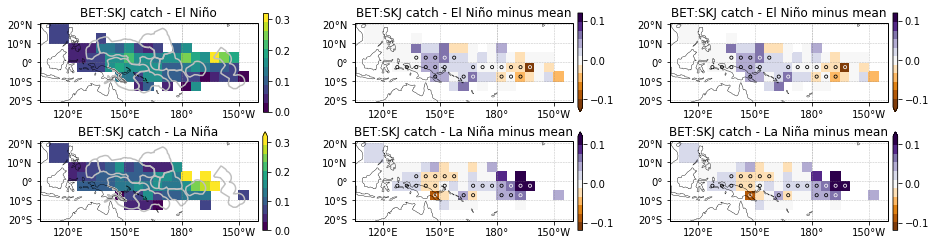

In [110]:
mapvarnow = 'bettoskj'
%run figure_notebooks/fig4_suppfig4_5.ipynb

### Figure 5

SKJ CPUE boxplot # of months in obs:
PLW 192 723 211
FSM 248 1049 277
PNG 368 1531 424
SLB 109 500 157
NRU 74 260 70
MHL 48 204 63
KIR-G 170 574 129
TUV 54 175 59
KIR-P 36 74 10
KIR-L 35 39 0
BET CPUE boxplot # of months in obs:
PLW 192 723 211
FSM 248 1049 277
PNG 368 1531 424
SLB 109 500 157
NRU 74 260 70
MHL 48 204 63
KIR-G 170 574 129
TUV 54 175 59
KIR-P 36 74 10
KIR-L 35 39 0
BET:SKJ CPUE boxplot # of months in obs:
PLW 192 723 211
FSM 248 1047 275
PNG 368 1529 424
SLB 109 500 157
NRU 73 259 70
MHL 48 202 61
KIR-G 170 568 129
TUV 53 174 59
KIR-P 36 73 10
KIR-L 34 38 0


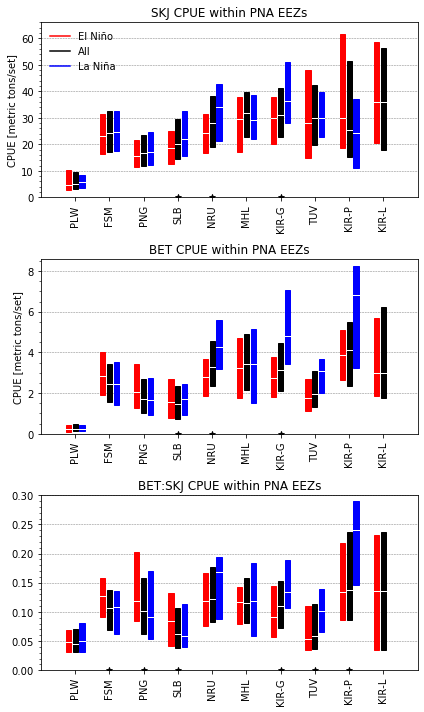

In [115]:
%run figure_notebooks/fig5.ipynb

### Figure 6

NameError: name 'axtopnow' is not defined

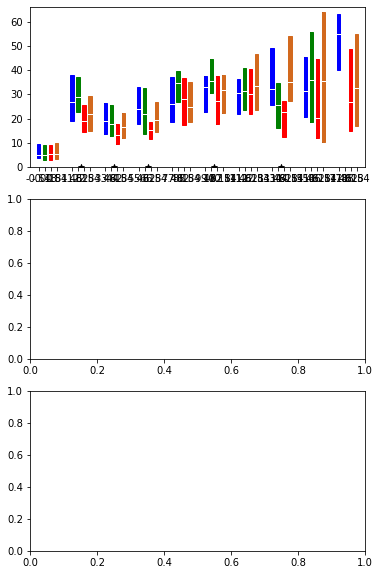

In [116]:
%run figure_notebooks/fig6.ipynb

### Figure 7

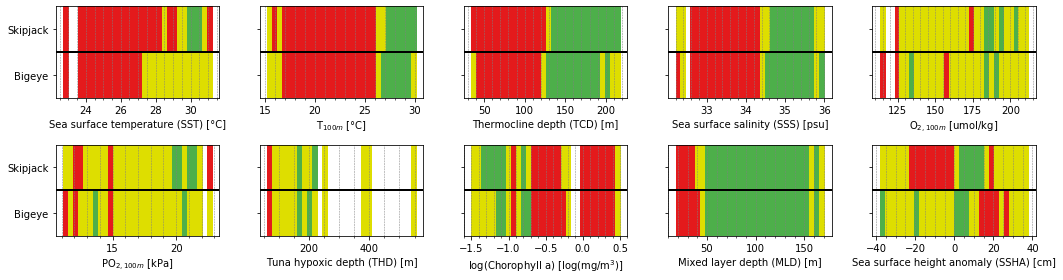

In [117]:
%run figure_notebooks/fig7.ipynb

### Figure 8

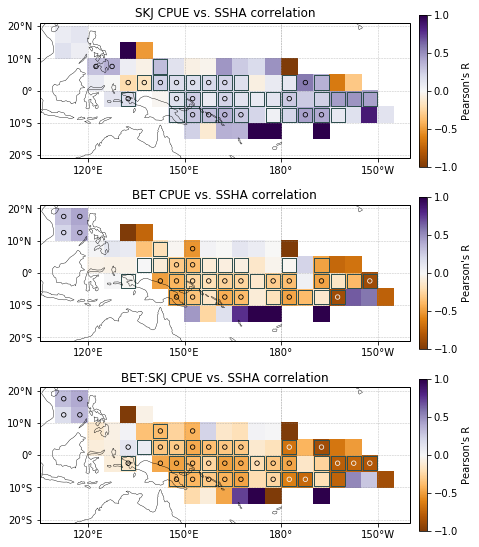

In [139]:
%run figure_notebooks/fig8.ipynb

# Plot supp figures

### Supplementary Figure 2

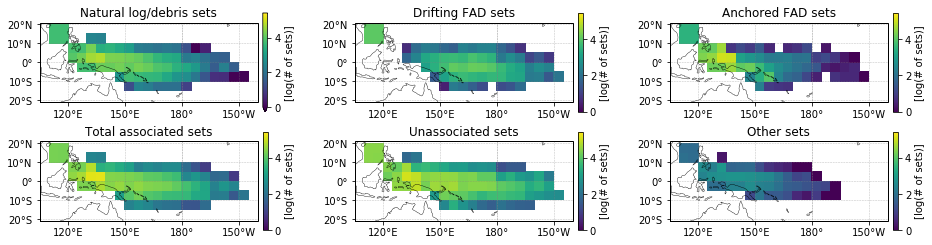

In [142]:
%run figure_notebooks/suppfig2.ipynb

### Supplementary Figure 3

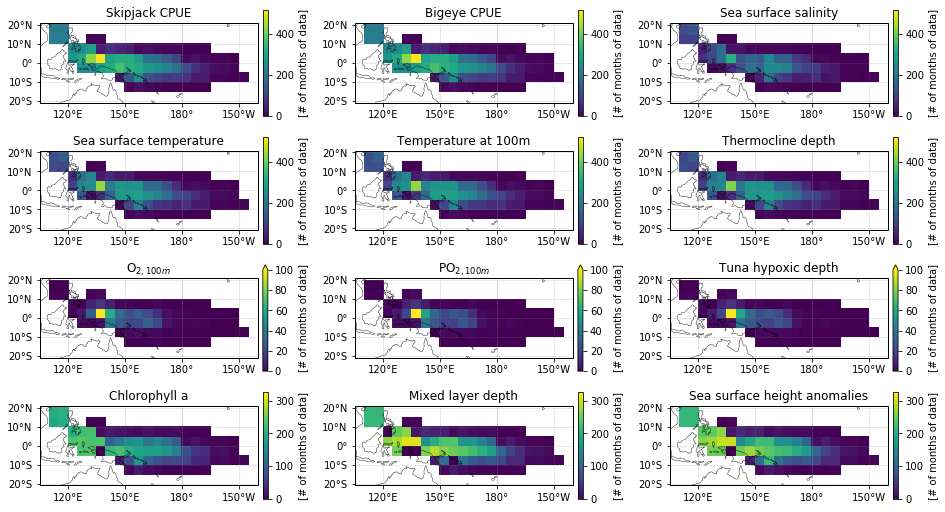

# of monthly mean data pts overlapping w/ skj_cp_tot:
lat: 9842
time: 9842
bettoskj_cp_tot: 9819
skj_cp_tot: 9842
bet_cp_tot: 9842
sst: 7079
temp100: 7267
tcd: 6926
sss: 5220
o2100: 627
po2100: 580
thd: 591
logchl: 6605
mld: 7395
ssha: 7936
oni: 9842
# of monthly mean data pts overlapping w/ bet_cp_tot:
lat: 9842
lon: 9842
bettoskj_cp_tot: 9819
skj_cp_tot: 9842
bet_cp_tot: 9842
sst: 7079
temp100: 7267
tcd: 6926
sss: 5220
o2100: 627
po2100: 580
thd: 591
logchl: 6605
mld: 7395
ssha: 7936
oni: 9842
# of monthly mean data pts overlapping w/ bettoskj_cp_tot:
lon: 9819
time: 9819
bettoskj_cp_tot: 9819
skj_cp_tot: 9819
bet_cp_tot: 9819
sst: 7059
temp100: 7247
tcd: 6907
sss: 5206
o2100: 626
po2100: 579
thd: 590
logchl: 6593
mld: 7379
ssha: 7921
oni: 9819


In [144]:
%run figure_notebooks/suppfig3.ipynb

### Supplementary Figures 4-5

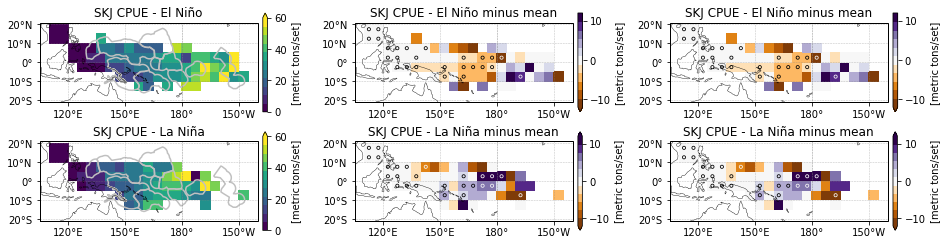

In [149]:
mapvarnow = 'skj'
%run figure_notebooks/fig4_suppfig4_5.ipynb

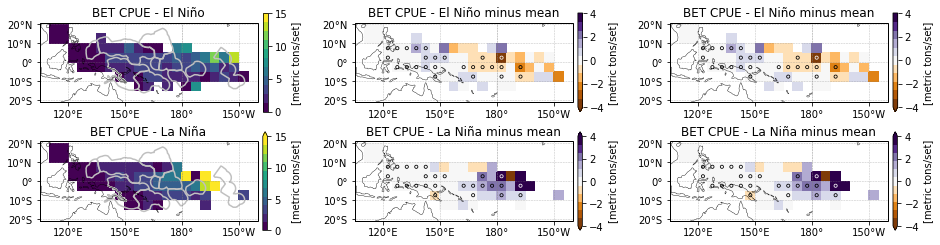

In [120]:
mapvarnow = 'bet'
%run figure_notebooks/fig4_suppfig4_5.ipynb

### Supplementary Figures 6-8

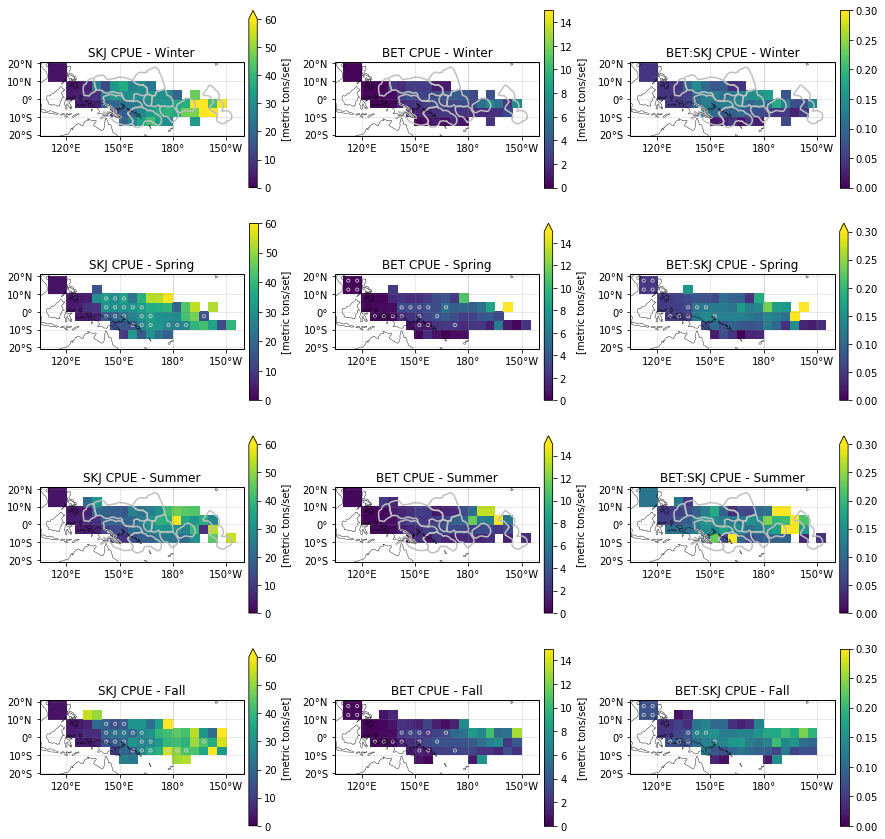

In [145]:
%run figure_notebooks/suppfig6_8.ipynb

### Supplementary Figures 9-10

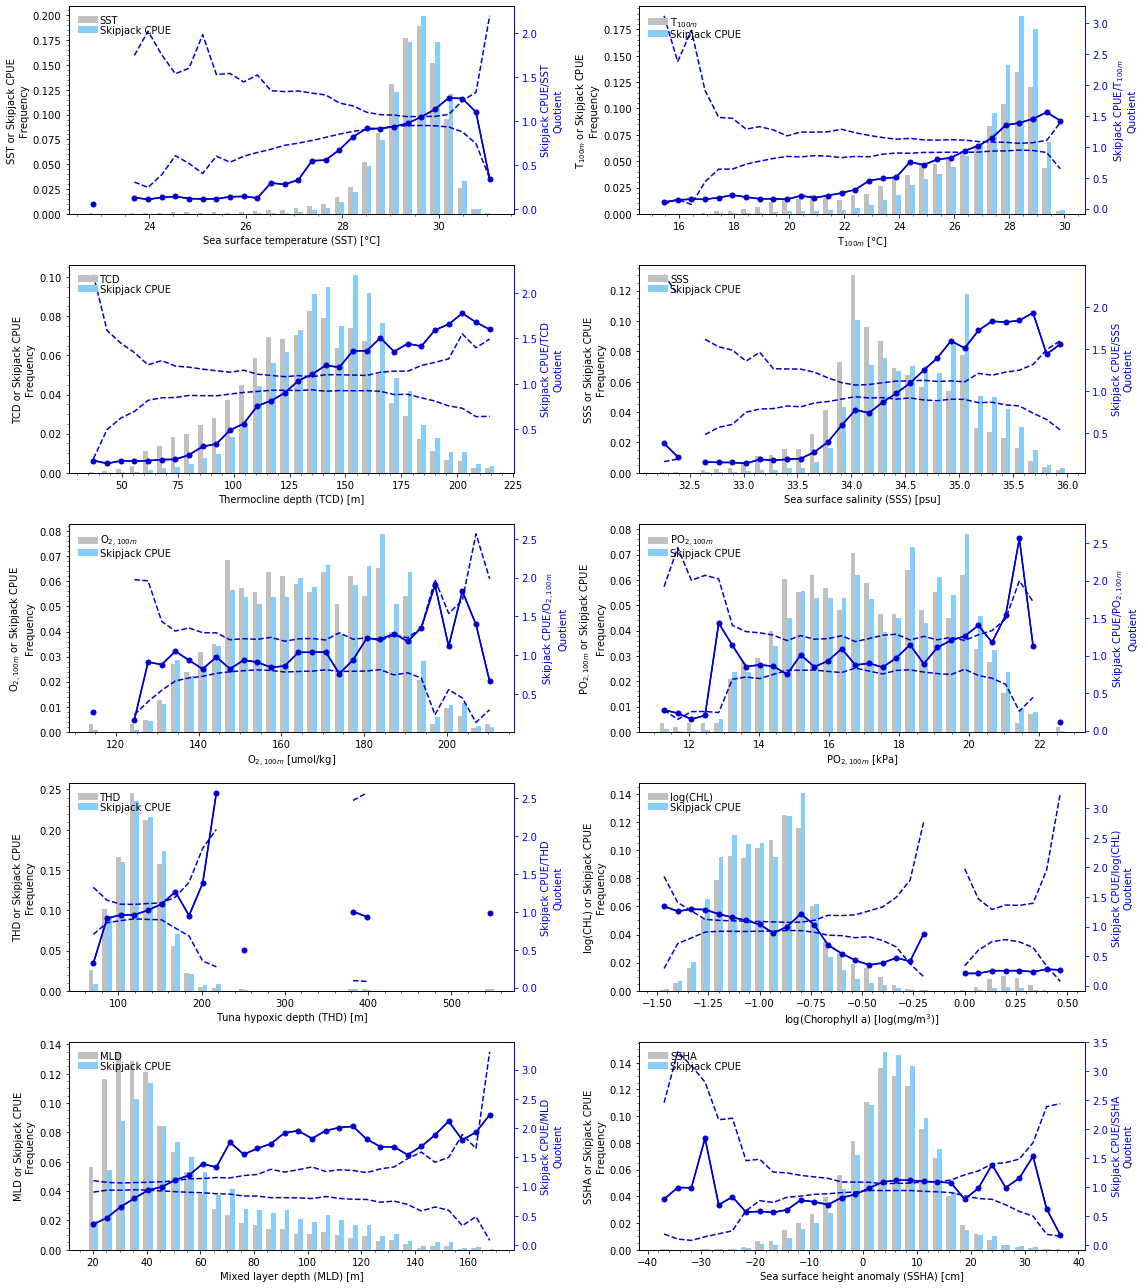

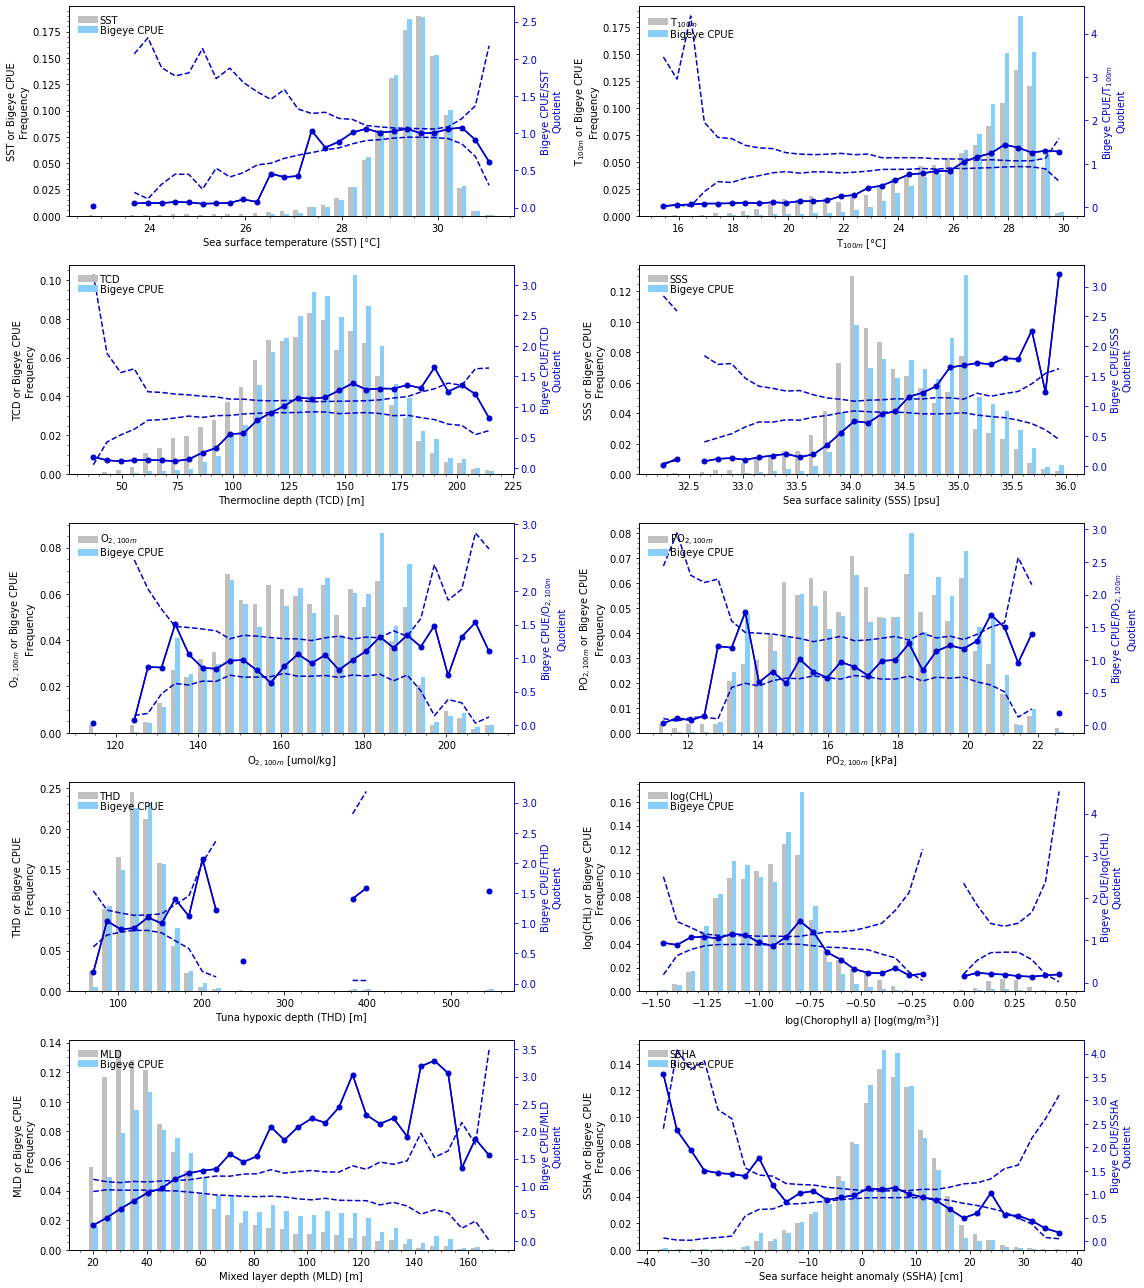

In [150]:
%run figure_notebooks/suppfig9_10.ipynb

### Supplementary Figures 11-13

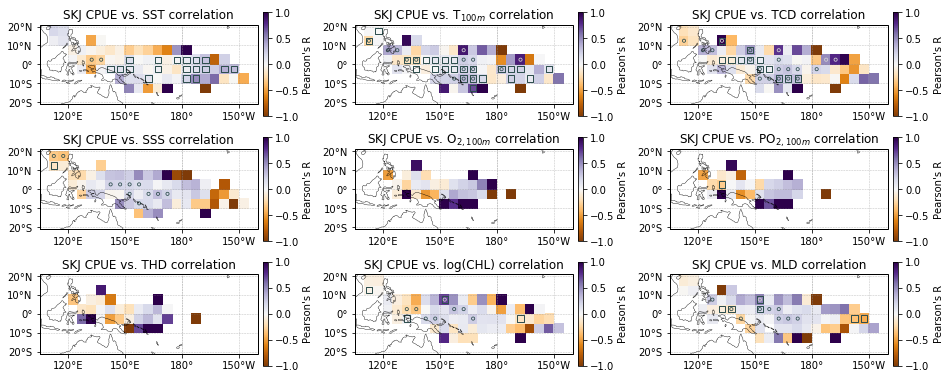

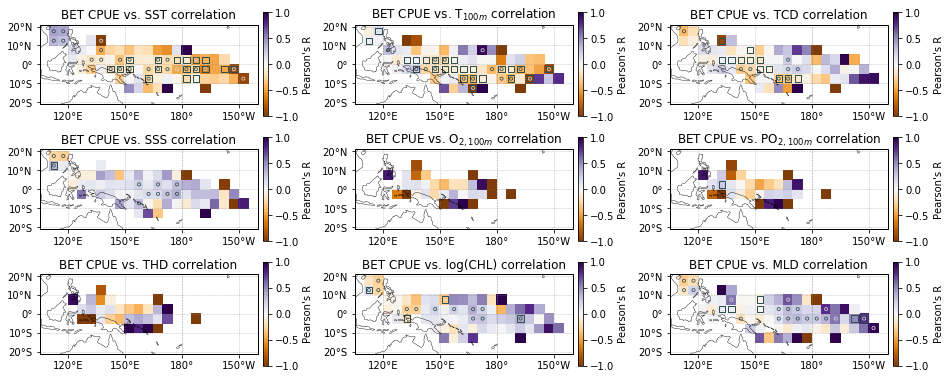

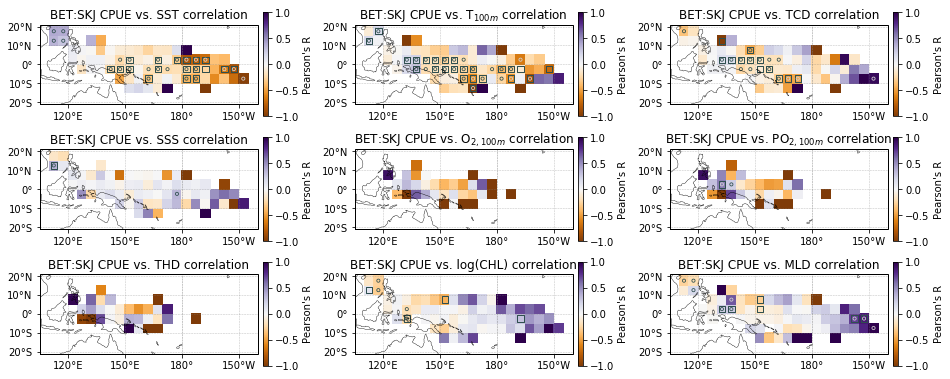

In [151]:
%run figure_notebooks/suppfig11_13.ipynb

### Supplementary Figure 14

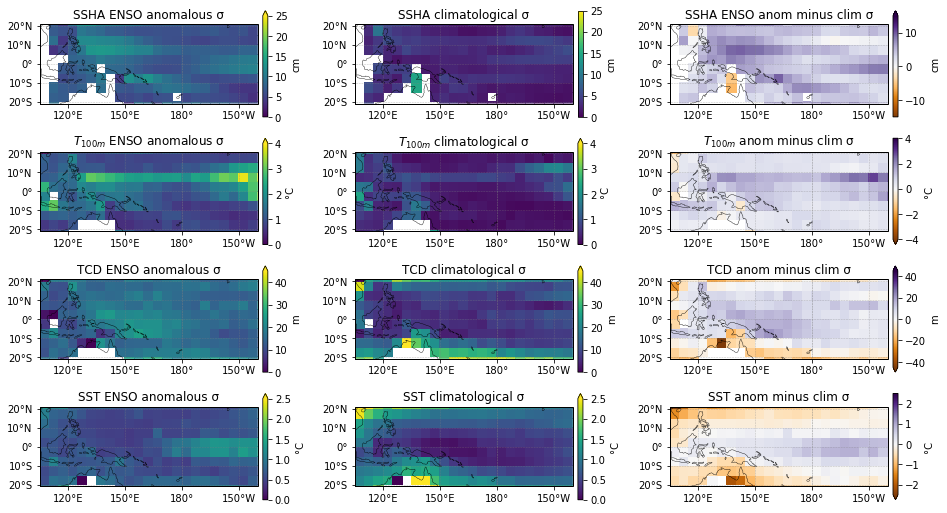

In [152]:
%run figure_notebooks/suppfig14.ipynb